In [229]:
# 기초 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 문제 정의

### Title: `Titanic - Machine Learning from Disaster`

### Purpose: use machine Learning to create a model that predicts which passengers survived the Titanic shipwreck.
> In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data description
> `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.<br>
> `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

|Variable|Definition|Key|
|--------|----------|---|
|survive|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex| |
|Age|Age in years| |
|sibsp|# of siblings / spouses aboard the Titanic| |
|parch|# of parents / children aboard the Titanic| |
|ticket|Ticket number| |
|fare|Passenger fare| |
|cabin|Cabin number| |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstwon, S = Southampton|

Variable Notes
> `pclass`: A proxy for socio-economic status (SES)
> - 1st = Upper  /  2nd = Middle  /   3rd = Lower
> 
> `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
> 
> `sibsp`: The dataset defines family relations in this way...
> - Sibling = brother, sister, stepbrother, stepsister    /    Spouse = husband, wife (mistresses and fiancés were ignored)
>
> `parch`: The dataset defines family relations in this way...
> - Parent = mother, father    /    Child = daughter, son, stepdaughter, stepson
> - Some children travelled only with a nanny, therefore parch=0 for them.

### Evaluation
Goal
> It is your job to predict if a passenger survived the sinking of the Titanic or not.<br>
> For each in the test set, you must predict a 0 or 1 value for the variable.

Metric
> Your score is the percentage of passengers you correctly predict. This is known as accuracy.

Submission File Format
> You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

# 1. 데이터 불러오기

In [230]:
# 데이터의 파일 경로 설정 및 파일 이름 확인
import os

for dirpath, _, filenames in os.walk(os.getcwd()+'\data'):    # os.walk() returns a 3-tuple of strings(dirpath, dirnames, filenames)
    print('Absolute path of data file: ', dirpath)
    path = dirpath+'/'    # 불러오고자 하는 데이터의 base path 설정

    print('File names: ', end=' ')
    for filename in filenames:
        print(filename, end='   ')    # 파일 이름을 출력

Absolute path of data file:  c:\Users\prohe\OneDrive\바탕 화면\github_manage\Kaggle\Titanic - ML from Disaster\data
File names:  gender_submission.csv   test.csv   titanic.zip   train.csv   

In [231]:
# 데이터 불러오기
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')

In [232]:
df = train_data.copy()  # EDA를 위한 원본 데이터 복사

# 2. 데이터 탐색하기

In [233]:
df.head(5)    # 데이터 구조 살펴보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
df.info()    # 데이터의 정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 알 수 있는 정보
> - row: 891 / column: 12
> - age에 Null 값이 꽤나 존재한다(177개).
> - Cabin은 대부분이 null 값이고, Embarked에도 2개 정도 빈 값이 보인다.

In [235]:
len(df['Ticket'].unique())    # Ticket 열의 고유값 확인

681

In [236]:
len(df['Cabin'].unique())    # Cabin 열의 고유값 확인

148

> 나의 생각
> - 이름은 생존자 예측에 있어서 별다른 도움이 되지 않을 것으로 보인다.
>   - 이름에 따라 성별이나 나이를 유추할 수도 있지만, 따로 정보가 있기 때문에 지워도 문제가 없을 것으로 생각된다.
> - Ticket의 경우 891개의 행 중에서 고유값이 681개가 나오며, 특별한 규칙이 보이지 않기 때문에 생존자 예측에 있어서 큰 의미가 없는 것 같다.
>   - 혹시나 Ticket의 고유 번호에 따라 생각할 수 있는 정보는 다른 데이터로 대체할 수 있을 것 같다.(승선 위치 = Embarked / 객실 위치 = cabin)
> - cabin의 경우 객실 위치에 따라 생존에 유리한 영향을 끼쳤을 수 있을 것이라 생각이 들지만, Titanic의 단면도를 알지 않은 이상 판단하기 어려운 면이 있다.
>   - 또한 대부분의 값이 null값이기 때문에 지워도 괜찮을 것이라 판단된다.

In [237]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)    # Name, Ticket, Cabin 열 삭제

In [238]:
df.head(5)    # 삭제된 데이터 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


> 이번에는 시각화를 통해 유의미한 정보를 찾아보자.

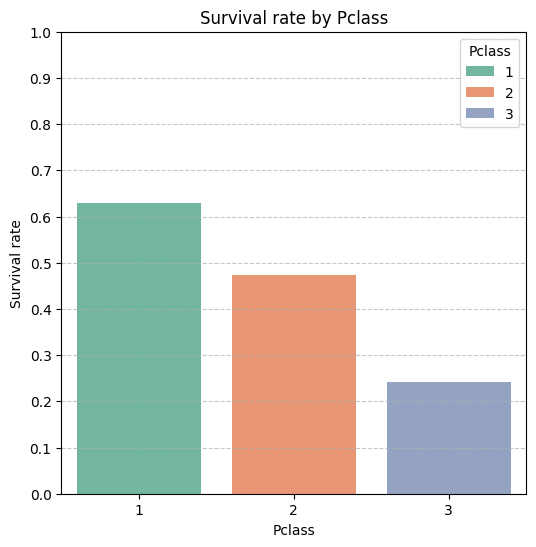

In [239]:
# Pclass에 따른 생존율 시각화
survival_rate_by_Pclass = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 막대 차트로 시각화
plt.figure(figsize=(6, 6))
sns.barplot(data=survival_rate_by_Pclass, x='Pclass', y='Survived', palette='Set2', hue='Pclass')
plt.ylim(0, 1)
plt.ylabel('Survival rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Survival rate by Pclass')
plt.show()

> 높은 Pclass의 승객일수록 생존률이 좀 더 높았다. 이에 대해 좀 더 자세히 살펴보자.

In [240]:
# Pclass에 따른 요금 평균
Fare_by_Pclass = df[['Fare', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)
Fare_by_Pclass

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [241]:
df[df['Pclass'] == 1]['Fare'].min()     # Pclass 1의 최소값 확인

0.0

> Pclass를 나누는 요금의 기준을 살펴보기 위해 min()를 살펴보았더니, 요금이 0인 경우가 발견되었다..!

In [242]:
df[df['Fare']==0]    # 요금이 0인 데이터 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,180,0,3,male,36.0,0,0,0.0,S
263,264,0,1,male,40.0,0,0,0.0,S
271,272,1,3,male,25.0,0,0,0.0,S
277,278,0,2,male,NaN,0,0,0.0,S
302,303,0,3,male,19.0,0,0,0.0,S
413,414,0,2,male,NaN,0,0,0.0,S
466,467,0,2,male,NaN,0,0,0.0,S
481,482,0,2,male,NaN,0,0,0.0,S
597,598,0,3,male,49.0,0,0,0.0,S
633,634,0,1,male,NaN,0,0,0.0,S


In [243]:
df['Fare'].sort_values().unique()[:10]      # 최하위 10개 Fare의 고유값 확인

array([0.    , 4.0125, 5.    , 6.2375, 6.4375, 6.45  , 6.4958, 6.75  ,
       6.8583, 6.95  ])

In [244]:
len(df[df['Fare'] == 0])    # 요금이 0인 데이터의 개수 확인

15

> 아무래도 요금이 0인 경우는 무언가 잘못 입력된 것 같다. 임의의 값을 채우도록 하자

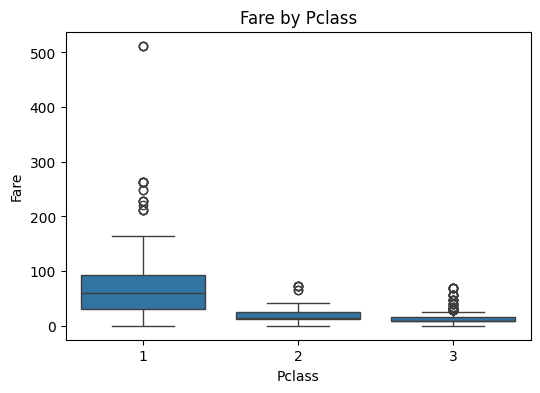

In [245]:
# Pclass별 Fare의 boxplot 시각화
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.show()

> 각 Pclass별 boxplot을 보았을 때 이상치가 꽤나 관찰되기 때문에 평균값보다는 중앙값으로 대체하자.

In [246]:
df.loc[(df['Pclass']==1) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==1]['Fare'].median().round(4)     # Pclass 1이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
df.loc[(df['Pclass']==2) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==2]['Fare'].median().round(4)     # Pclass 2이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
df.loc[(df['Pclass']==3) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==3]['Fare'].median().round(4)     # Pclass 3이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체

In [247]:
df.loc[df['Fare'] == 0]    # Fare가 0인 데이터 확인(정상적으로 대체가 되었는지 확인)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [248]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

더 해볼 것
- Embarked 변수 특성 확인
- null값 적절히 채우기
- 전체적인 숫자형 트겅의 요약 정보 및 히스토그램을 통해 분포 살펴보기
- 이상치 처리하기
- ------------
- 위 정도 하고 간단한 모델들 돌려보기
- 성능 지표들 분석하고 필요하다면 데이터 간의 상관관계 파악